Author: Audrey
(beginning date:2022/10/04, end date: 2022/10/04)

### Introduction

 In this week notbook, one of subquestion which is "Do people have preferences about which week do more activities in a month?" will be explored.

##### External libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#(beginning date:2022/10/04, end date: 2022/10/04)

##### Read data in

In [2]:
# p5 = pd.read_csv("D:/university/s2/3406/2022-DATA3406-RE06-Group04/src/resources/Participant-05-detail.csv")
p5 = pd.read_csv("resources/Participant-05-detail.csv")

Now, the 5th data has been saved in varible p5.

Since data cleaning and exploreation have been done last week,so I will solve the sub-question directly.

##### Data analysis

As the question described, we would like to know that whether people have perferences about which week do more exercises in a month, which means we do not care about the distrubution of physical activities per day, so we can group data by data firstly.

In [3]:
# only keep columns that we need
data = pd.DataFrame({"Date": p5['Date'], "Count":p5['Count']})
# convert type of date to datatiimes 
data['Date'] = pd.to_datetime(data['Date'])
# group data by date
per_day_data =  data.groupby(['Date']).sum()
per_day_data

,Count
Date,
2022-01-01,114
2022-01-02,8681
2022-01-03,5104
2022-01-04,8031
2022-01-05,7743
...,...
2022-08-28,12888
2022-08-29,6036
2022-08-30,9820


As we can see from above table, all data has been grouped by date and the 'count' column represents the total number of steps per day. Also, type of the "Date" column has been changed to datetime. 

In order to do futher actions, we need to covert data seriers index to data conlumn.

In [5]:
per_day_data.reset_index(inplace=True)
per_day_data

,Date,Count
0,2022-01-01,114
1,2022-01-02,8681
2,2022-01-03,5104
3,2022-01-04,8031
4,2022-01-05,7743
...,...,...
217,2022-08-28,12888
218,2022-08-29,6036
219,2022-08-30,9820
220,2022-08-31,10523


Date conlumn has successfuly convert to conlumn. Then, since we would like to compare which week the participant exercise more in one month, we need to aggreate data by week as well, and the count conlumn will represent the total numbers of steps per week.

In [6]:
weekly_data = per_day_data.resample('W', on="Date").sum()
weekly_data

,Count
Date,
2022-01-02,8795
2022-01-09,32533
2022-01-16,347
2022-01-23,0
2022-01-30,4
2022-02-06,24943
2022-02-13,48152
2022-02-20,35990
2022-02-27,49512


All data have been aggreated by week. 
Then ,we will convert date to datetime again and extract month and date for futher actions.

In [7]:
weekly_data.reset_index(inplace=True)
weekly_data['month'] = pd.DatetimeIndex(weekly_data['Date']).month
weekly_data['day'] = pd.DatetimeIndex(weekly_data['Date']).day
weekly_data

,Date,Count,month,day
0,2022-01-02,8795,1,2
1,2022-01-09,32533,1,9
2,2022-01-16,347,1,16
3,2022-01-23,0,1,23
4,2022-01-30,4,1,30
5,2022-02-06,24943,2,6
6,2022-02-13,48152,2,13
7,2022-02-20,35990,2,20
8,2022-02-27,49512,2,27
9,2022-03-06,50478,3,6


Now the "Date" conlumn has been converted to datetime type, and two columns "month" and "day" have been added.

Then, we would like to use max() function to figuer out which week the participant do more exercises in a month.

In [8]:
group_data = weekly_data.groupby(['month']).max()
group_data

,Date,Count,day
month,,,
1,2022-01-30,32533,30
2,2022-02-27,49512,27
3,2022-03-27,90738,27
4,2022-04-24,101373,24
5,2022-05-29,131266,29
6,2022-06-26,129374,26
7,2022-07-31,72322,31
8,2022-08-28,70121,28
9,2022-09-04,33180,4


Weeks that people did the most exercise have been selected from each month. 

We will polt weeks with max steps and "day" conlumn will help us to finger out what the week with max steps is.

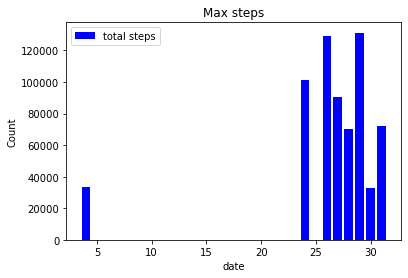

In [9]:
y= group_data['Count']
x = group_data['day']
plt.bar(x, y, label="total steps", color='b')
plt.plot()

plt.xlabel("date")
plt.ylabel("Count")
plt.title("Max steps")
plt.legend()
plt.show()

According the plot above, the max steps usually occured the last or the first week of a month. 

#### Conclusion:

Based on our analysis above, we can simply conclude that people prefer do more exercises in the last week of a month. However, since multiple days data are missing, there might a bias exits for the conclusion we made.